In [2]:
import pandas as pd
from functions import calc, retrieve, visualize as viz

import warnings
warnings.filterwarnings('ignore')


In [3]:
def get_and_store_raw_data(fromCSV, numberOfStocks=50, daysSince=30):
    tickers_df = retrieve.get_tickers(numberOfStocks)
    if (fromCSV):
        print ("Returning stored data.")
        (rawdata, spreads, volumes) = ((pd.read_csv('data/close.csv')).set_index('Date'),
                            (pd.read_csv('data/spreads.csv')).set_index('Date'),
                            (pd.read_csv('data/volumes.csv')).set_index('Date'))
    else:
        downloadedData = retrieve.get_downloaded_data(tickers_df, numberOfStocks, daysSince)
        rawdata = downloadedData['Close']
        spreads = (downloadedData['High'] - downloadedData['Low'])/(downloadedData['Close'])
        volumes = downloadedData['Volume']
        rawdata.to_csv('./data/close.csv')
        spreads.to_csv('./data/spreads.csv')
        volumes.to_csv('./data/volumes.csv')

    return (rawdata, spreads, volumes, tickers_df)
    
def processData(closes, volumes, QUICK_EMA_PERIOD=7, SLOW_EMA_PERIOD=14, latestWindow=2):
    print ("Calculating indicators...")
    companies = closes.columns.values

    EMA_df = calc.get_EMA_df(QUICK_EMA_PERIOD, SLOW_EMA_PERIOD, closes)
    OBV_df= calc.get_OBV_df(volumes, closes)
    keyStats = calc.get_intersection_point(EMA_df, closes)
    (keyStats['avgRatio'], keyStats['MinAbsRatio']) = calc.ratioWrapper(EMA_df, companies, keyStats)
    keyStats['latestGrowth'] = round(closes.pct_change()[-latestWindow:].min(),5)
    keyStats['ratioContr'] = calc.get_stocks_growing_now(closes, keyStats, 3)

    return(EMA_df, OBV_df, keyStats) 

import matplotlib.pyplot as plt

def plot_one_with_obv(x, EMA_df, closes, OBV_df):
    fig, axs = (plt.subplots(2, sharex=True))
    x_axis = closes.index
    axs[0].plot(x_axis, EMA_df['Quick'][x], 'r')
    axs[0].plot(x_axis, EMA_df['Slow'][x], 'b')
    axs[0].plot(x_axis, closes[x], 'g')
    axs[1].plot(x_axis, OBV_df[x], 'g')

def showData(closes, EMA_df, OBV_df, keyStats, filterSet, tickers_df):
    filteredCompanies = viz.filter_companies(keyStats, filterSet)
    filteredCompanies.to_csv("./logs/filteredCompanies_" + pd.to_datetime('today').strftime('%Y%m%d')) 
    viz.plot_all(closes, EMA_df, OBV_df, filteredCompanies, tickers_df, limit=10)



In [4]:
"""
Filterset Sample. Use 0 or comment for Neutral

filterSet = dict({
    "aboveAvgRatio":1, 
    "aboveMinAbs":1, 
    "minPositivePeriod":4, 
    "ratioContr":1, 
    "latestGrowth":0.8
    })

timeframes dict({
    daysSince,
    qema_period,
    sema_period
    }) 
"""

filterSet = dict({
    #"aboveAvgRatio":0.02, 
    "aboveMinAbs":0.0001, 
    #"minPositivePeriod":4, 
    #"ratioContr":1,
    "latestGrowth":0.005
     })



def find_stocks(filterSet, numberOfStocks=500):
    global closes, spreads, volumes, EMA_df, OBV_df, keyStats, tickers_df

    recalcMandatory = False
    if ('closes' not in globals()):
        (closes, spreads, volumes, tickers_df)= get_and_store_raw_data(fromCSV='keyStats' in globals(), numberOfStocks=numberOfStocks, daysSince=30)
        recalcMandatory = True
    
    if ('keyStats' not in globals() or recalcMandatory):
        (EMA_df, OBV_df, keyStats) = processData(closes, volumes, QUICK_EMA_PERIOD=7, SLOW_EMA_PERIOD=14, latestWindow=2)
        recalcMandatory = False
    
    showData(closes, EMA_df, OBV_df, keyStats, filterSet, tickers_df)
    return (closes, spreads, volumes, EMA_df, keyStats, tickers_df)

#(closes, spreads, EMA_df, keyStats) = find_stocks(filterSet)



In [5]:
(ts_today, ts_origin) = retrieve.get_timestamps(2)

Starting filtering...
--> Main companies filtered. 5 outstanding companies.
Displaying 5 first companies
Company GOOGL
Company GOOG
Company AAPL
Company ACGL
Company ACN


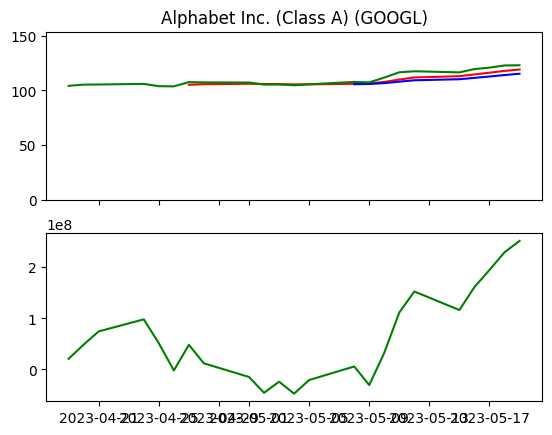

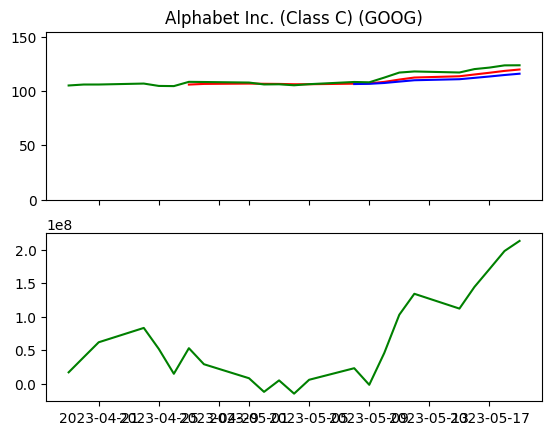

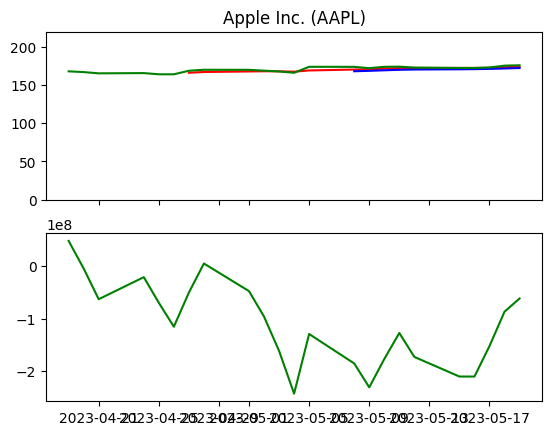

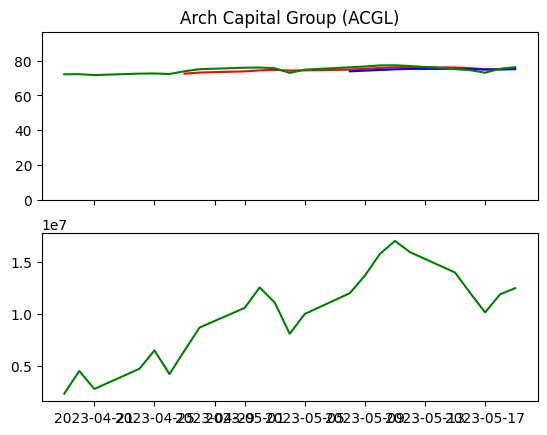

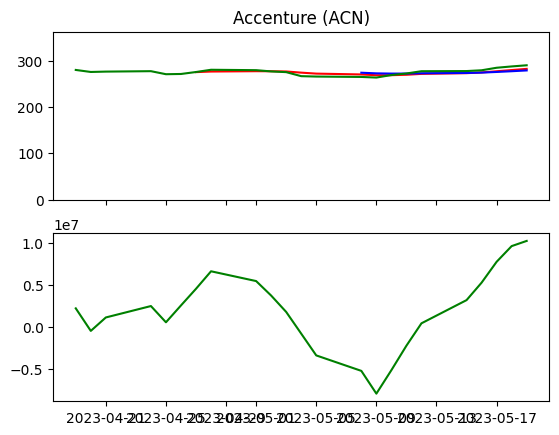

In [9]:
%colors nocolor

#del ([keyStats])
#del ([closes])
#del ([keyStats, closes])


(closes, spreads, volumes, EMA_df, keyStats, tickers_df) = find_stocks(numberOfStocks=50, filterSet=dict({
    #"aboveAvgRatio":0.02, 
    "aboveMinAbs":0.0001, #Originally 0.0001 
    #"minPositivePeriod":4, 
    #"ratioContr":1,
    "latestGrowth":0.000 #Originally 0.005
     }))

In [7]:
OBV_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,APTV,ARE,ATVI,AWK,AXP,GOOG,GOOGL,LNT,MMM,MO
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-19,1178400.0,31596500.0,1931700.0,47720200.0,4826900.0,1086500.0,12425400.0,2314200.0,2204700.0,1775200.0,...,1608100.0,787200.0,5069400.0,552600.0,3768600.0,16732000.0,20905700.0,1917300.0,1918000.0,5103000.0
2023-04-20,-147500.0,7356400.0,3071300.0,-4736200.0,8635000.0,2310200.0,5012200.0,4491400.0,-481400.0,3723100.0,...,-811400.0,34600.0,12099200.0,1201600.0,-7063800.0,39247300.0,48726500.0,415800.0,-1777300.0,-2268200.0
2023-04-21,1386100.0,23904400.0,1929100.0,-63073500.0,13447100.0,3098400.0,11313300.0,2761500.0,1119300.0,1881500.0,...,-2878000.0,780900.0,6487300.0,2038700.0,-3181300.0,61626300.0,74526600.0,1527800.0,-8169100.0,6814700.0
2023-04-24,529400.0,-1115400.0,1112900.0,-21123900.0,18176000.0,3602600.0,5971400.0,4701700.0,2479000.0,350400.0,...,-726800.0,97000.0,14641900.0,3027000.0,-5654800.0,83037200.0,98069400.0,2595500.0,-4633100.0,13367600.0
2023-04-25,-1625500.0,-34731000.0,179000.0,-69838000.0,23682200.0,4167800.0,334700.0,6464500.0,543600.0,-2062700.0,...,-2862600.0,-1690300.0,28025600.0,3852200.0,-9076100.0,51629100.0,51405300.0,3531300.0,-9704500.0,20878100.0
2023-04-26,1378300.0,-68166200.0,-991700.0,-115336800.0,18490200.0,3282100.0,-3905300.0,4189600.0,2553000.0,-4865900.0,...,-1209800.0,-2770400.0,-22180300.0,3046400.0,-11865200.0,14560900.0,-1942300.0,2463500.0,-12877900.0,11941300.0
2023-04-27,2503600.0,-19798200.0,-157800.0,-50434500.0,1427200.0,3918700.0,351900.0,6454700.0,4536600.0,-2527100.0,...,-4515000.0,-1565000.0,-10034700.0,1992000.0,-9721700.0,52796100.0,48146900.0,3769200.0,-10484800.0,22918900.0
2023-04-28,4536400.0,25259200.0,517300.0,4774700.0,8551000.0,2930000.0,5187800.0,8659400.0,6621100.0,-465900.0,...,-3112200.0,-368600.0,-211000.0,1222000.0,-7341900.0,28838200.0,12007100.0,5390800.0,-6501600.0,33989300.0
2023-05-01,5549300.0,54361000.0,-135200.0,-47698200.0,14152000.0,1420700.0,8910700.0,10550200.0,5455500.0,-2333900.0,...,-4584900.0,-1026600.0,-5914500.0,614500.0,-9145500.0,7911900.0,-14674600.0,7477000.0,-8790900.0,42833300.0


In [8]:
OBV_df= calc.get_OBV_df(volumes, closes)